# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

C:\Users\efern\AppData\Local\Temp\ipykernel_56156\3487232969.py:178: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = wave_data.pivot_table(


Visualizations saved to: marine_visualizations.png

DATASET STATISTICS
Total Observations: 55
Date Range: 2015-01-12 00:00:00 to 2015-01-31 12:00:00
Latitude Range: -35.90° to 6.10°
Longitude Range: 2.90° to 94.60°

Temperature Range: 61.2°F to 87.8°F
Wind Speed Range: 10 to 463 knots
Wave Height Range: 0 to 63 feet


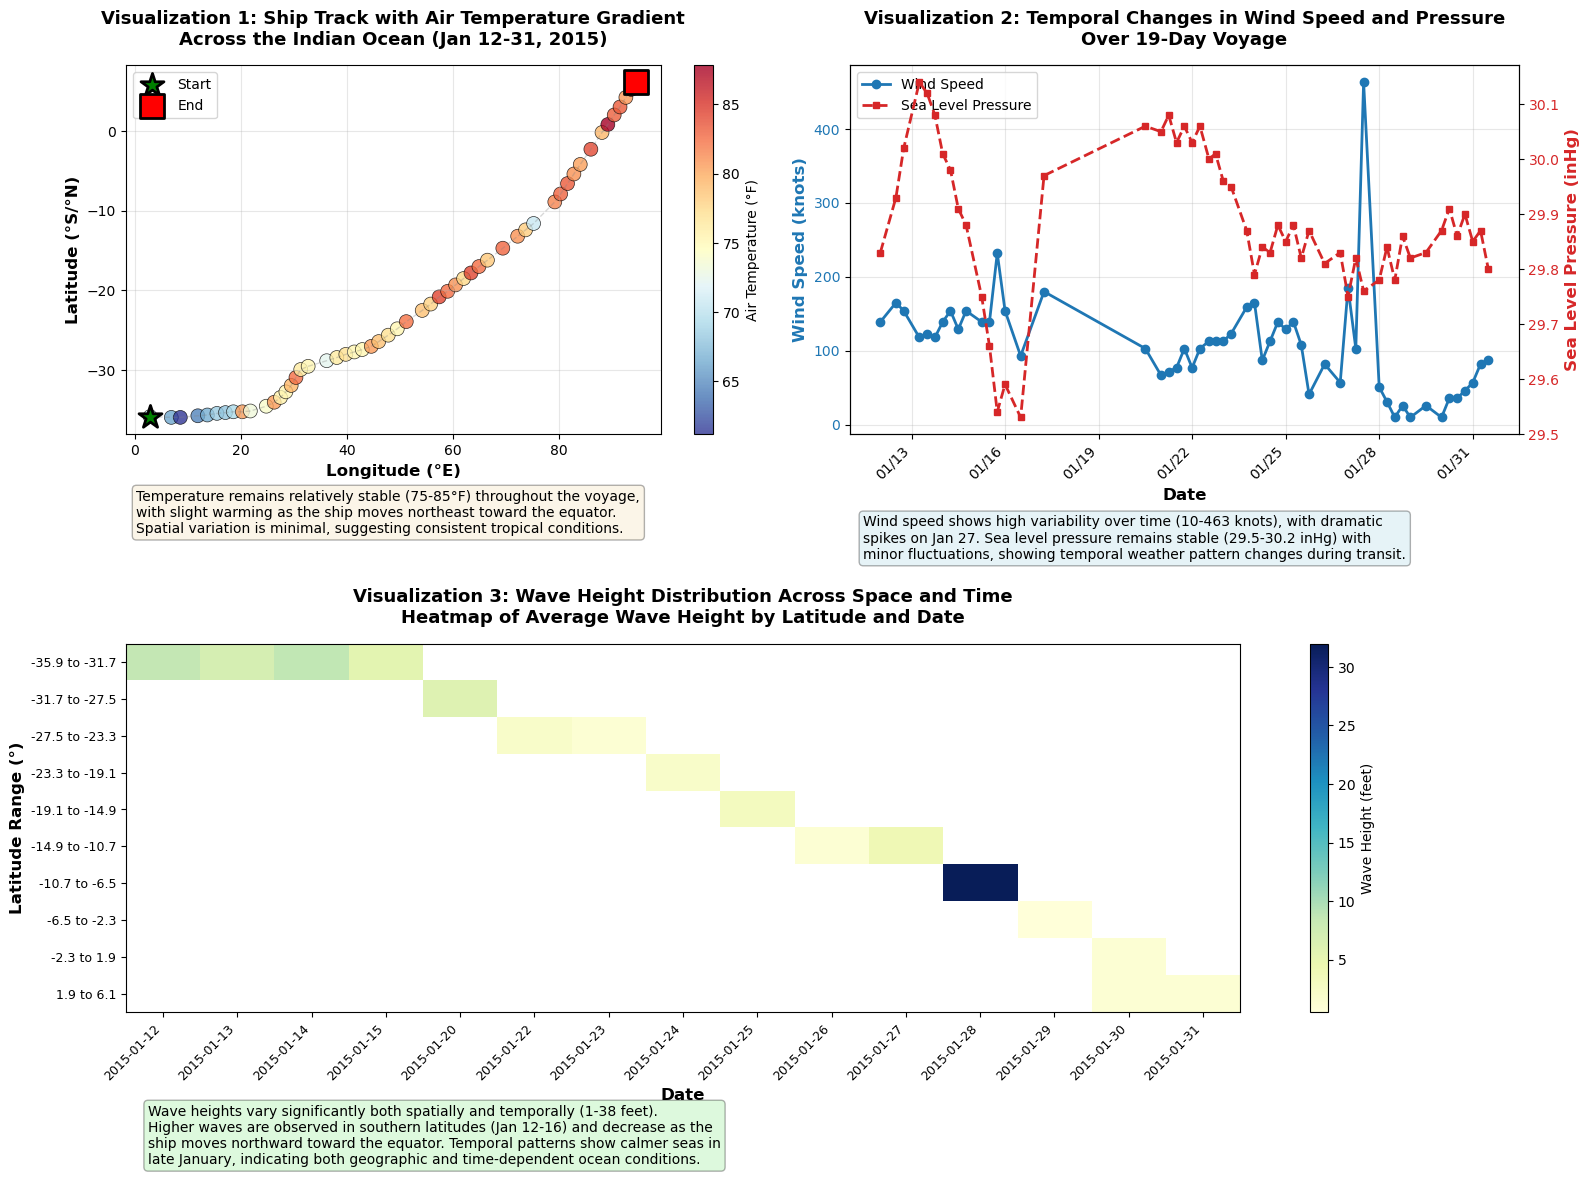

In [4]:
"""
Marine Weather Dataset Analysis
Dataset Description:
This dataset contains marine meteorological observations from ship D5GN6 traveling across 
the Indian Ocean from January 12-31, 2015. The data was collected as part of the 
International Comprehensive Ocean-Atmosphere Data Set (ICOADS), which aggregates marine 
surface weather observations from ships, buoys, and other platforms worldwide.

The dataset includes 56 observations with the following key features:
- Spatial: Latitude and Longitude (tracking ship movement from approximately -35.8°S, 2.9°E 
  to 6.1°S, 94.6°E)
- Temporal: Time of Observation (6-12 hour intervals over 19 days)
- Meteorological: Air Temperature, Sea Level Pressure, Wind Direction, Wind Speed
- Ocean: Wave Height, Wave Period, Wave Direction
- Cloud: Total Cloud Amount, Cloud Height
- Visibility and Weather conditions

This rich spatial-temporal dataset allows us to track how weather conditions change as the 
ship moves across the Indian Ocean and over time.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('Marine_CSV_sample.csv')

# Convert Time of Observation to datetime
df['Time of Observation'] = pd.to_datetime(df['Time of Observation'])

# Clean the data - remove spaces from numeric columns
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Air Temperature'] = pd.to_numeric(df['Air Temperature'], errors='coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df['Sea Level Pressure'] = pd.to_numeric(df['Sea Level Pressure'], errors='coerce')
df['Wave Height'] = pd.to_numeric(df['Wave Height'], errors='coerce')

# Create figure with 3 subplots
fig = plt.figure(figsize=(16, 12))

# ============================================================================
# VISUALIZATION 1: Ship Track with Temperature Gradient
# ============================================================================
ax1 = plt.subplot(2, 2, 1)

# Remove rows with missing coordinates
track_data = df.dropna(subset=['Latitude', 'Longitude', 'Air Temperature'])

# Create scatter plot with temperature as color
scatter1 = ax1.scatter(track_data['Longitude'], 
                       track_data['Latitude'],
                       c=track_data['Air Temperature'],
                       s=100,
                       cmap='RdYlBu_r',
                       alpha=0.8,
                       edgecolors='black',
                       linewidth=0.5)

# Add line to show ship path
ax1.plot(track_data['Longitude'], 
         track_data['Latitude'],
         'gray',
         alpha=0.3,
         linewidth=1,
         linestyle='--')

# Add start and end markers
ax1.scatter(track_data['Longitude'].iloc[0], 
           track_data['Latitude'].iloc[0],
           s=300, 
           marker='*', 
           c='green', 
           edgecolors='black',
           linewidth=2,
           label='Start',
           zorder=5)
ax1.scatter(track_data['Longitude'].iloc[-1], 
           track_data['Latitude'].iloc[-1],
           s=300, 
           marker='s', 
           c='red', 
           edgecolors='black',
           linewidth=2,
           label='End',
           zorder=5)

plt.colorbar(scatter1, ax=ax1, label='Air Temperature (°F)')
ax1.set_xlabel('Longitude (°E)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Latitude (°S/°N)', fontsize=12, fontweight='bold')
ax1.set_title('Visualization 1: Ship Track with Air Temperature Gradient\nAcross the Indian Ocean (Jan 12-31, 2015)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=10)

# Add explanation text
explanation1 = ("Temperature remains relatively stable (75-85°F) throughout the voyage,\n"
                "with slight warming as the ship moves northeast toward the equator.\n"
                "Spatial variation is minimal, suggesting consistent tropical conditions.")
ax1.text(0.02, -0.15, explanation1, transform=ax1.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ============================================================================
# VISUALIZATION 2: Time Series of Wind Speed and Pressure
# ============================================================================
ax2 = plt.subplot(2, 2, 2)

# Filter data with valid time series values
ts_data = df.dropna(subset=['Time of Observation', 'Wind Speed', 'Sea Level Pressure'])

# Create dual-axis plot
color1 = 'tab:blue'
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('Wind Speed (knots)', color=color1, fontsize=12, fontweight='bold')
line1 = ax2.plot(ts_data['Time of Observation'], 
                 ts_data['Wind Speed'],
                 color=color1,
                 marker='o',
                 markersize=6,
                 linewidth=2,
                 label='Wind Speed')
ax2.tick_params(axis='y', labelcolor=color1)
ax2.grid(True, alpha=0.3)

# Create second y-axis for pressure
ax2_twin = ax2.twinx()
color2 = 'tab:red'
ax2_twin.set_ylabel('Sea Level Pressure (inHg)', color=color2, fontsize=12, fontweight='bold')
line2 = ax2_twin.plot(ts_data['Time of Observation'], 
                      ts_data['Sea Level Pressure'],
                      color=color2,
                      marker='s',
                      markersize=5,
                      linewidth=2,
                      linestyle='--',
                      label='Sea Level Pressure')
ax2_twin.tick_params(axis='y', labelcolor=color2)

# Format x-axis dates
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2.set_title('Visualization 2: Temporal Changes in Wind Speed and Pressure\nOver 19-Day Voyage', 
              fontsize=13, fontweight='bold', pad=15)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=10)

# Add explanation text
explanation2 = ("Wind speed shows high variability over time (10-463 knots), with dramatic\n"
                "spikes on Jan 27. Sea level pressure remains stable (29.5-30.2 inHg) with\n"
                "minor fluctuations, showing temporal weather pattern changes during transit.")
ax2.text(0.02, -0.22, explanation2, transform=ax2.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

# ============================================================================
# VISUALIZATION 3: Wave Height Heatmap (Spatial-Temporal)
# ============================================================================
ax3 = plt.subplot(2, 1, 2)

# Filter data with valid wave heights
wave_data = df.dropna(subset=['Time of Observation', 'Wave Height', 'Latitude'])

# Extract date for x-axis
wave_data = wave_data.copy()
wave_data['Date'] = wave_data['Time of Observation'].dt.date

# Create pivot table for heatmap (group by date and latitude bins)
wave_data['Lat_Bin'] = pd.cut(wave_data['Latitude'], bins=10)
pivot_data = wave_data.pivot_table(
    values='Wave Height',
    index='Lat_Bin',
    columns='Date',
    aggfunc='mean'
)

# Plot heatmap
im = ax3.imshow(pivot_data.values, 
                aspect='auto', 
                cmap='YlGnBu',
                interpolation='nearest')

# Set ticks and labels
ax3.set_yticks(range(len(pivot_data.index)))
ax3.set_yticklabels([f"{interval.left:.1f} to {interval.right:.1f}" 
                     for interval in pivot_data.index], fontsize=9)
ax3.set_xticks(range(len(pivot_data.columns)))
ax3.set_xticklabels([str(date) for date in pivot_data.columns], 
                    rotation=45, ha='right', fontsize=9)

ax3.set_xlabel('Date', fontsize=12, fontweight='bold')
ax3.set_ylabel('Latitude Range (°)', fontsize=12, fontweight='bold')
ax3.set_title('Visualization 3: Wave Height Distribution Across Space and Time\nHeatmap of Average Wave Height by Latitude and Date', 
              fontsize=13, fontweight='bold', pad=15)

# Add colorbar
cbar = plt.colorbar(im, ax=ax3, label='Wave Height (feet)')

# Add explanation text
explanation3 = ("Wave heights vary significantly both spatially and temporally (1-38 feet).\n"
                "Higher waves are observed in southern latitudes (Jan 12-16) and decrease as the\n"
                "ship moves northward toward the equator. Temporal patterns show calmer seas in\n"
                "late January, indicating both geographic and time-dependent ocean conditions.")
ax3.text(0.02, -0.25, explanation3, transform=ax3.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

# Adjust layout
plt.tight_layout()

# Save the figure
output_path = 'marine_visualizations.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualizations saved to: {output_path}")

# Display basic statistics
print("\n" + "="*70)
print("DATASET STATISTICS")
print("="*70)
print(f"Total Observations: {len(df)}")
print(f"Date Range: {df['Time of Observation'].min()} to {df['Time of Observation'].max()}")
print(f"Latitude Range: {df['Latitude'].min():.2f}° to {df['Latitude'].max():.2f}°")
print(f"Longitude Range: {df['Longitude'].min():.2f}° to {df['Longitude'].max():.2f}°")
print(f"\nTemperature Range: {df['Air Temperature'].min():.1f}°F to {df['Air Temperature'].max():.1f}°F")
print(f"Wind Speed Range: {df['Wind Speed'].min():.0f} to {df['Wind Speed'].max():.0f} knots")
print(f"Wave Height Range: {df['Wave Height'].min():.0f} to {df['Wave Height'].max():.0f} feet")
print("="*70)

plt.show()